<!-- ![RWTH Logo](https://www.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaaagazb) -->
![iAMB Logo](https://www.iamb.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaanwtny)
# BIOLOG and GSMM Substrate Growth Comparison

* Execute a single cell: <span class="fa-play fa"></span>
* Execute all cells: Menu: Run <span class="fa-chevron-right fa"></span> Run All Cells
* To reboot kernel: <span class="fa-refresh fa"></span>

Find more in the reference (menu: Help <span class="fa-chevron-right fa"></span> Jupyter Reference).

## Introduction

Description Biolog system.


In [1]:
import os
import pandas as pd
from datetime import date
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

from iambcodes.cobra import *
from iambcodes.biolog import *


## Loading of the GSMM SBML model

In [2]:
Today = date.today().strftime('%y%m%d')
Target_GSMM = '/home/ulf/Documents/Ustilago_maydis-GEM/model'
ImageType = 'svg'


ModelFile =  'iUma22_Curated.xml'# 'iCL1079.xml' 'iUma22_Curated.xml'
FileAdress = os.path.join(Target_GSMM, ModelFile)
model=read_sbml_model(FileAdress)
model

<Model UMAY at 0x7f0f6f556190>

## Loading the BIOLOG results

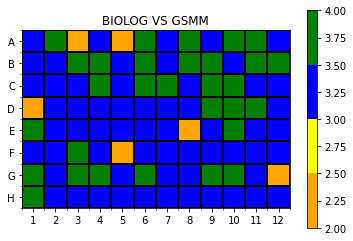

Well correlation overview saved as /home/ulf/Documents/Ustilago_maydis-GEM/data/BIOLOG/Biolog21/220214_PM1_SubstrateUse+GSMM_well.svg.


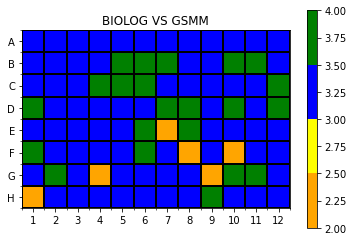

Well correlation overview saved as /home/ulf/Documents/Ustilago_maydis-GEM/data/BIOLOG/Biolog21/220214_PM2A_SubstrateUse+GSMM_well.svg.
([0, 0], 52)
([0, 1], 0)
([1, 0], 12)
([1, 1], 128)


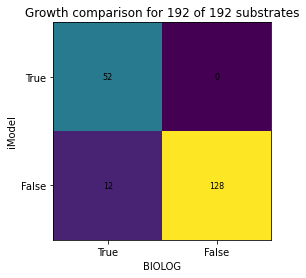

Analysis saved as: /home/ulf/Documents/Ustilago_maydis-GEM/data/BIOLOG/Biolog21/220215_PM-BiologGSMMComp.csv


In [3]:
Target_BIOLOG = '/home/ulf/Documents/Ustilago_maydis-GEM/data/BIOLOG/Biolog21'

BFile =  ['220214_PM1_SubstrateUse.csv','220214_PM2A_SubstrateUse.csv'] #['211203_PM1_SubstrateUse.csv','211203_PM2A_SubstrateUse.csv']

for Indx, File in enumerate(BFile):
    WellFigFile = os.path.join(Target_BIOLOG, '{}+GSMM_well.{}'.format(os.path.splitext(File)[0], ImageType))
    ConfMatFile = os.path.join(Target_BIOLOG, '{}+GSMM_ConfMat.{}'.format(os.path.splitext(File)[0], ImageType))
    FileAdress = os.path.join(Target_BIOLOG, File)
    PM_df = pd.read_csv(FileAdress, names=['WellID','Name','BiGG','Growth'])
    PMGrowth, RID, model = CheckPMinGSMM(model, PM_df, ['EX_glc__D_e'])
    PM_df['GSMM'] = PMGrowth
    PM_df['PM-GSMM'] = RID
    VisualizeWell(PM_df['PM-GSMM'].values, plot_title='BIOLOG VS GSMM', export_file=WellFigFile, cmap='discrete5')
    print('Well correlation overview saved as {}.'.format(WellFigFile))
    if Indx>0:
        PM_all = PM_all.append(PM_df) #,'GSMM','PM-GSMM'
    else:
        PM_all = PM_df
VisualizeConfMatrix(PM_all['PM-GSMM'].values, export_file=ConfMatFile)
TargBiolog = os.path.join(Target_BIOLOG,'{}_PM-BiologGSMMComp.csv'.format(Today))
PM_all.to_csv(TargBiolog, index=False)
XmlNew = os.path.join(Target_GSMM,'iUma22_BiologCorr.xml')
# write_sbml_model(model, XmlNew)

print('Analysis saved as: {}'.format(TargBiolog))

In [6]:
# TestSubstrate(model, ['EX_orn_e'])
PMGrowth

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.37,
 0.48,
 0.43,
 0,
 0,
 0.35,
 0.57,
 0,
 0,
 0,
 0,
 1.56,
 1.09,
 0.65,
 0,
 0,
 0,
 0,
 0,
 1.04,
 1.56,
 0,
 0,
 0,
 0,
 0,
 1.04,
 0.43,
 0,
 0.14,
 0,
 0.14,
 0,
 0,
 0,
 0,
 0,
 0.29,
 0.0,
 0.14,
 0,
 0,
 0.0,
 0,
 0.39,
 0,
 0,
 0,
 0,
 0.15,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0.13,
 0,
 0.0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 0.29,
 0.15,
 0.0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0.26,
 0,
 0,
 0]